##  Bipartite graphs

* A graph that is partitioned into two sets
* Nodes are only connected to nodes in other partitions, in other words a node cannot be connected to another node in the same partition.

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [6]:
with open("Data/code/nutrients.csv") as infile:

    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)

print(len(G))
print(len(G.edges()))

41
75


In [7]:
# identifying self-loops 

loops = list(nx.selfloop_edges(G))
print(loops)

[('tomatoes', 'tomatoes')]


In [8]:
# removing self-loops edges

G.remove_edges_from(loops)
loops = list(nx.selfloop_edges(G))
loops

[]

In [9]:
print(len(G))
print(len(G.edges()))

41
74


In [10]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "folates",
"Ca", "Mn", "thiamin", "riboflavin", "C", "E", "niacin"))

bipartite = {node: ("nutrient" if node in nutrients else "food") for node in G.nodes()}

nx.set_node_attributes(G, bipartite, "bipartite")
print(G.nodes(data=True))

[('A', {'bipartite': 'nutrient'}), ('carrots', {'bipartite': 'food'}), ('eggs', {'bipartite': 'food'}), ('fatty fish', {'bipartite': 'food'}), ('green leafy vegs', {'bipartite': 'food'}), ('liver', {'bipartite': 'food'}), ('milk', {'bipartite': 'food'}), ('tomatoes', {'bipartite': 'food'}), ('B12', {'bipartite': 'nutrient'}), ('B6', {'bipartite': 'nutrient'}), ('asparagus', {'bipartite': 'food'}), ('beans', {'bipartite': 'food'}), ('kidneys', {'bipartite': 'food'}), ('potatoes', {'bipartite': 'food'}), ('C', {'bipartite': 'nutrient'}), ('pumpkins', {'bipartite': 'food'}), ('Ca', {'bipartite': 'nutrient'}), ('broccoli', {'bipartite': 'food'}), ('cheese', {'bipartite': 'food'}), ('Cu', {'bipartite': 'nutrient'}), ('nuts', {'bipartite': 'food'}), ('whole grains', {'bipartite': 'food'}), ('D', {'bipartite': 'nutrient'}), ('mushrooms', {'bipartite': 'food'}), ('E', {'bipartite': 'nutrient'}), ('seeds', {'bipartite': 'food'}), ('Mn', {'bipartite': 'nutrient'}), ('legumes', {'bipartite': 'foo

* Let's  write a function that returns the nodes from a given partition in a bipartite graph.

In [11]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [12]:
# Print the number of nodes in the 'nutrient' partition
print(get_nodes_from_partition(G, 'nutrient'))
print(len(get_nodes_from_partition(G, 'nutrient')))

# Print the number of nodes in the 'food' partition
print(get_nodes_from_partition(G, 'food'))
print(len(get_nodes_from_partition(G, 'food')))

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'riboflavin', 'niacin', 'folates', 'thiamin']
15
['carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'asparagus', 'beans', 'kidneys', 'potatoes', 'pumpkins', 'broccoli', 'cheese', 'nuts', 'whole grains', 'mushrooms', 'seeds', 'legumes', 'wheat', 'beef', 'spinach', 'poultry', 'shellfish', 'veg oils', 'yogurt']
26


### Add the degree centrality score

In [13]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
print(dcs)
for n in G.nodes():
    G.nodes[n]['centrality'] = dcs[n]

{'A': 0.17500000000000002, 'carrots': 0.05, 'eggs': 0.07500000000000001, 'fatty fish': 0.125, 'green leafy vegs': 0.15000000000000002, 'liver': 0.15000000000000002, 'milk': 0.125, 'tomatoes': 0.05, 'B12': 0.125, 'B6': 0.2, 'asparagus': 0.05, 'beans': 0.07500000000000001, 'kidneys': 0.1, 'potatoes': 0.07500000000000001, 'C': 0.125, 'pumpkins': 0.025, 'Ca': 0.125, 'broccoli': 0.05, 'cheese': 0.025, 'Cu': 0.17500000000000002, 'nuts': 0.125, 'whole grains': 0.1, 'D': 0.07500000000000001, 'mushrooms': 0.025, 'E': 0.1, 'seeds': 0.07500000000000001, 'Mn': 0.15000000000000002, 'legumes': 0.05, 'wheat': 0.025, 'Se': 0.07500000000000001, 'Zn': 0.17500000000000002, 'beef': 0.125, 'riboflavin': 0.125, 'niacin': 0.125, 'folates': 0.07500000000000001, 'spinach': 0.025, 'poultry': 0.07500000000000001, 'shellfish': 0.05, 'thiamin': 0.025, 'veg oils': 0.025, 'yogurt': 0.025}


[0.17500000000000002, 0.05, 0.07500000000000001, 0.125, 0.15000000000000002, 0.15000000000000002, 0.125, 0.05, 0.125, 0.2, 0.05, 0.07500000000000001, 0.1, 0.07500000000000001, 0.125, 0.025, 0.125, 0.05, 0.025, 0.17500000000000002, 0.125, 0.1, 0.07500000000000001, 0.025, 0.1, 0.07500000000000001, 0.15000000000000002, 0.05, 0.025, 0.07500000000000001, 0.17500000000000002, 0.125, 0.125, 0.125, 0.07500000000000001, 0.025, 0.07500000000000001, 0.05, 0.025, 0.025, 0.025]


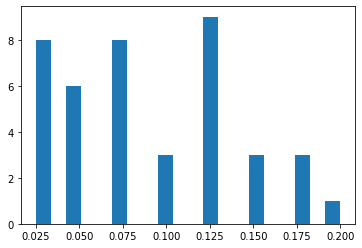

In [14]:
# Plot the degree distribution of dcs

deg_cent = [G.nodes[n]['centrality'] for n in G.nodes()]
print(deg_cent)
plt.hist(deg_cent, bins=20)
plt.show()

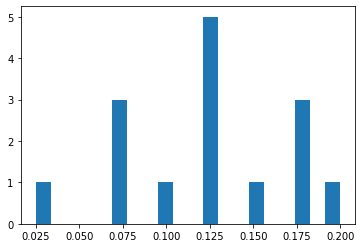

In [15]:
# Plot the degree distribution of nutrient_dcs

nutrient_dcs = [G.nodes[n]['centrality'] for n in G.nodes() if G.nodes[n]['bipartite']== "nutrient"]
plt.hist(nutrient_dcs, bins=20)
plt.show()

### Plotting using nxviz

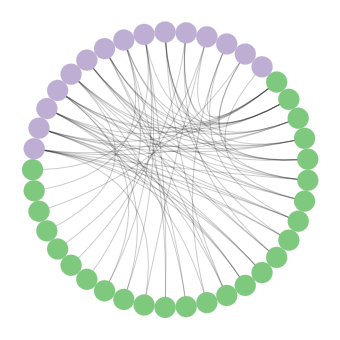

In [16]:
import nxviz as nv

# Create the CircosPlot object: c
c = nv.CircosPlot(G, node_color="bipartite", node_grouping="bipartite", node_order="centrality")

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

# compare it with the one in Network_2.ipynb

### Shared nodes in other partition

We will write a function that takes in two nodes, and returns the set of repository nodes that are shared between the two food nodes.

In [31]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between food 'green leafy vegs' and 'liver'
print(shared_partition_nodes(G, "green leafy vegs", 'milk'))

{'A', 'Ca', 'riboflavin'}


### Food similarity metric

We will write a function to compute a metric of similarity between two foods: the number of nutrients shared between two foods divided by the total number of nodes in the other partition. This can then be used to find foods that are similar to one another.

In [30]:
def food_similarity(G, food1, food2, nutrient_nodes):
    # Check that the nodes belong to the 'food' partition
    assert G.nodes[food1]['bipartite'] == 'food'
    assert G.nodes[food2]['bipartite'] == 'food'

    # Get the set of nodes shared between the two foods
    shared_nodes = shared_partition_nodes(G, food1, food2)

    # Return the fraction of nodes in the nutrient partition
    return len(shared_nodes) / len(nutrient_nodes)

# Compute the similarity score between foods "green leafy vegs" and 'liver'
nutrient_nodes = get_nodes_from_partition(G, "nutrient")
similarity_score = food_similarity(G, "green leafy vegs", 'milk', nutrient_nodes)

print(similarity_score)

0.2


### Find similar foods

We will find the foods most similar to given food. We'll use food_similarity() function above. 

A dictionary called similarities will be setup, in which the keys are the scores and the list of values are the nodes.

In [29]:
from collections import defaultdict

def most_similar_foods(G, food, food_nodes, nutrient_nodes):
    # Data checks
    assert G.nodes[food]['bipartite'] == 'food'

    # Get other nodes from food partition
    food_nodes = set(food_nodes)
    food_nodes.remove(food)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in food_nodes:
        similarity = food_similarity(G, food, n, nutrient_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of foods that share maximal similarity
    return similarities[max_similarity]

food_nodes = get_nodes_from_partition(G, 'food')
nutrient_nodes = get_nodes_from_partition(G, 'nutrient')

print(most_similar_foods(G, "green leafy vegs", food_nodes, nutrient_nodes))

['milk']


### Find Dİfferences

We will write a function that finds nutrients that first given food provides but the second not.  

In [35]:
def food_differences(G, food1, food2):
    
    # Get the set of nutrients that food1 provides
    nutrient_set1 = set(G.neighbors(food1))
    # Get the set of nutrients that food2 provides
    nutrient_set2 = set(G.neighbors(food2))

    # Identify differences that the food1 is connected to that the food2 is not connected to
    return nutrient_set1.difference(nutrient_set2)

# Print the differences
print(food_differences(G, 'green leafy vegs', 'milk'))

{'E', 'C', 'Mn'}
